<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python** <br>
**PROFESORES:** Germán González <br><br>


# Clase 3: Estadísticas descriptivas de geolocalización

- Paquete _geopandas_.
- Capas y siluetas. 



In [1]:
# !pip3 install pandas 
# !pip3 install numpy
# !pip3 install shapely 
# !pip3 install geopandas 

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import colors

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### El paquete _GeoPandas_ es la versión del famoso paquete _Pandas_ para trabajar con datos geográficos. 
#### Contiene funciones para manipular las geometrías de las observaciones y almacena los atributos estructurados como un DataFrame de Pandas con todos sus métodos usuales.

# Países del mundo

In [2]:
paises = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
paises

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


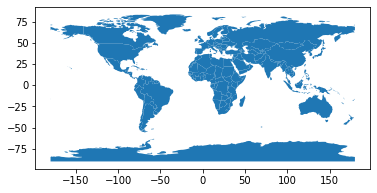

In [4]:
paises.plot();

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


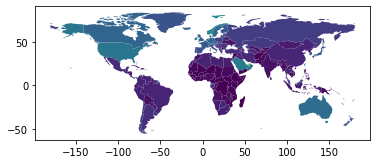

In [5]:
# Mapa coroplético por PIB pér cápita
# Limpiar los datos 
world = paises[(paises['pop_est'] > 0) & (paises['name'] != "Antarctica")]
# Crear la variable de PIB Per capita
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# Plot 
world.plot(column='gdp_per_cap');

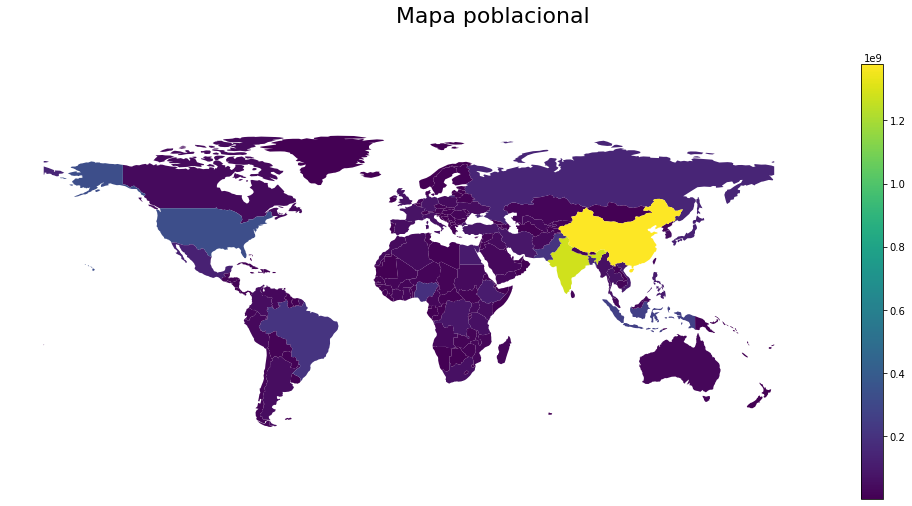

In [7]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar la variable de poblacion 
world.plot(column='pop_est', ax=ax, legend=True)
# Agregar leyenda
plt.suptitle('Mapa poblacional', fontsize = 22)
# Desaparecer la cuadricula
ax.axis('off');

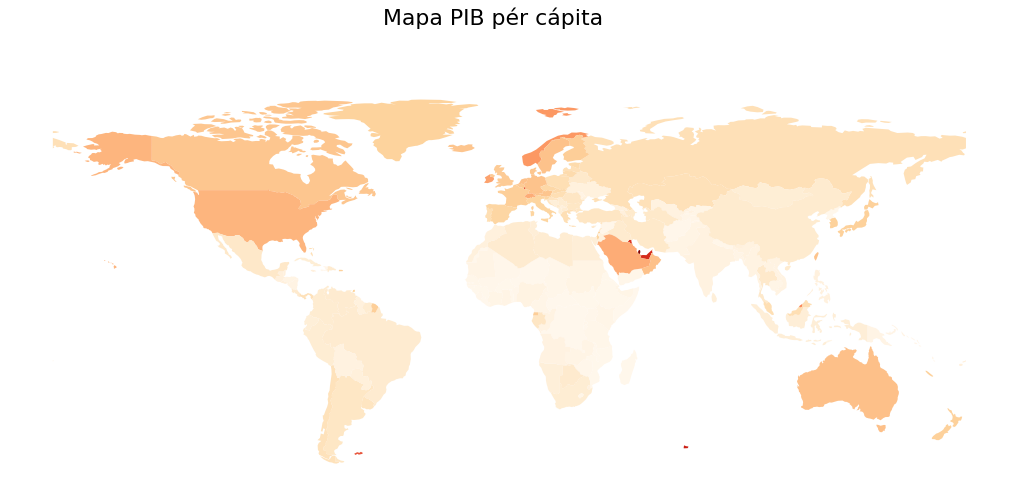

In [8]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar la variable de GPD 
world.plot(column='gdp_per_cap', ax=ax, cmap = 'OrRd')
# Agregar leyenda
plt.suptitle('Mapa PIB pér cápita', fontsize = 22)
# Desaparecer la cuadricula
ax.axis('off');

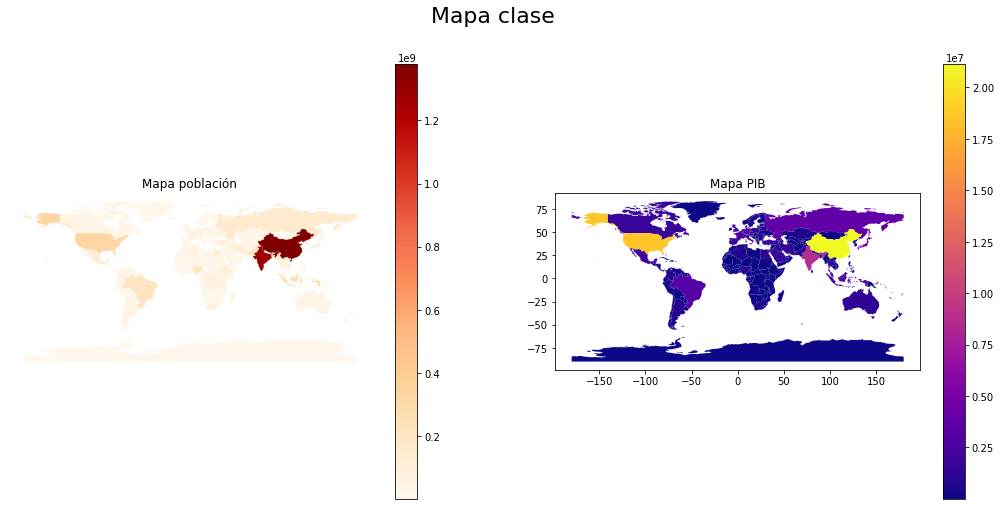

In [12]:
# Por ejemplo para hacer múltiples gráficos en una sola figura usamos el mismo plt.subplots(filas, columnas) indicando el número de filas y columnas de gráficos que queremos construir
fig, ax = plt.subplots(1,2,figsize = (18,8))
# En este caso ax es una lista de axes, y toca decirle en cual de todos estos es que queremos cada figura
paises.plot(column = 'pop_est', ax = ax[0], legend = True, cmap = 'OrRd') # Esto lo queremos en el primer axes ax[0]
ax[0].axis('off') # Para ese ax[0] queremos eliminar los ejes 
ax[0].set_title('Mapa población') # Y ponerle un título a este subgráfico
paises.plot(column = 'gdp_md_est', ax = ax[1], legend = True, cmap = 'plasma') # Ahora este mapa lo queremos en el segundo axes ax[1]
ax[1].set_title('Mapa PIB') # Le ponemos titulo al subgrafico
plt.suptitle('Mapa clase', fontsize = 22); # Agregamos un título a toda la figura

In [9]:
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

## Ciudades

In [10]:
ciudades

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


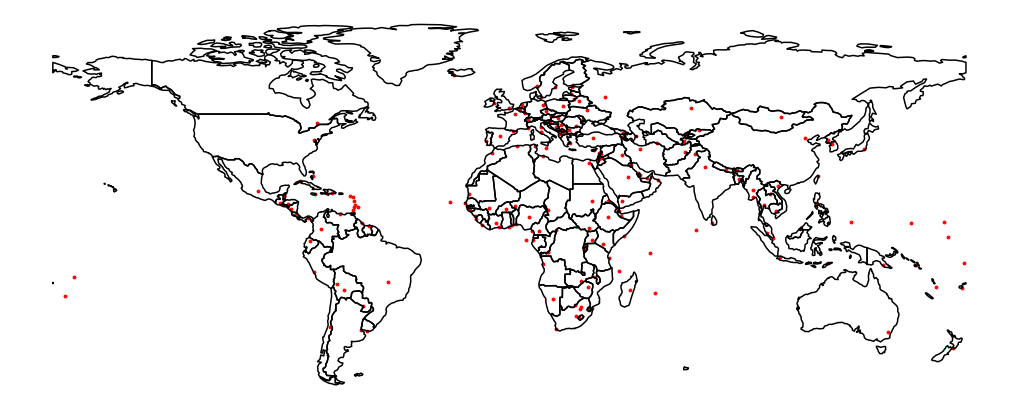

In [11]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar un mapa del mundo
world.boundary.plot(edgecolor='black', ax=ax)
# Graficar las ciudades 
ciudades.plot(ax=ax, marker='o', color='red', markersize=8)
# Desaparecer la cuadricula
ax.axis('off')
# Almacenar png
plt.savefig('ciudades_mundo.png');

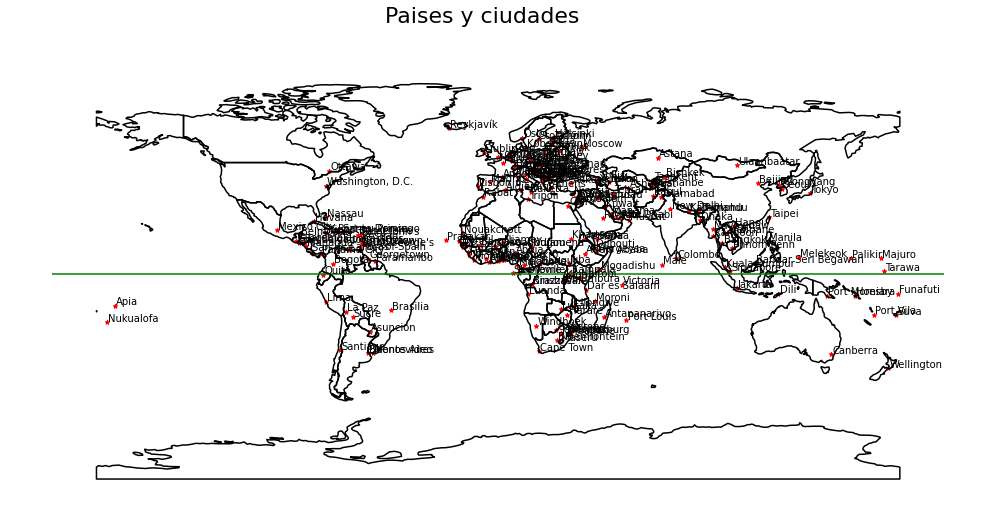

In [13]:
# Para agregar más capas nuevamente creamos los objetos figura y axes
fig, ax = plt.subplots(figsize = (18,8))
paises.boundary.plot(ax = ax, edgecolor = 'black') # Graficamos los bordes de los paises diciendole que lo pinte en ax = ax
ciudades.plot(ax = ax, marker = '*', color = 'red', markersize = 20) # Graficamos las ciudades nuevamente en ax = ax. Especificamos el color, el tamaño y el marcador.
ax.axis('off') # Eliminamos ejes.
# Luego agregamos los nombres de las ciudades con ax.text()
for i in range(len(ciudades)): # Para cada fila de la base de datos de ciudades
    # Escribimos el texto en la posición x de la longitud de la ciudad, la posición y de su laditud, y su nombre de la columna 'name'
    ax.text(ciudades.loc[i, 'geometry'].x + 0.5, ciudades.loc[i, 'geometry'].y + 0.5, ciudades.loc[i, 'name'])
plt.suptitle('Paises y ciudades', fontsize = 22) # Título del gráfico.
ax.hlines(0, -200, 200, color = 'green'); # Línea horizontal a la altura y = 0, y desde x_min = -200 hasta x_max = 200, en verde. Para lineas verticales ax.vlines
plt.savefig('ciudades_mundo.png'); # Guardamos la figura con plt.savefig(), se puede guardar en diferentes formatos y especificar calidad de la imágen y otros parámetros.

### Datos de eventos de minas antiperonal

In [7]:
minas = gpd.read_file('Datos/eventos_minas/')

In [8]:
minas

,a_o,codigo_dan,codigo_d_2,departamen,evento,latitud_ca,longitud_c,mes,municipio,sitio,tipo_area,tipo_event,tipo_lugar,geometry
0,1996.0,13.0,13549.0,BOLIVAR,Sin informaci?n,8.916994,-74.465777,7.0,PINILLOS,Sin informaci?n,Rural,Desminado militar en operaciones,Sin informacion,POINT (-74.46578 8.91699)
1,2013.0,68.0,68689.0,SANTANDER,Sin informaci?n,6.805170,-73.528320,3.0,SAN VICENTE DE CHUCUR?,Rul # 21 Vereda El Filon,Rural,Sospecha de campo minado,Fincas,POINT (-73.52832 6.80517)
2,2013.0,5.0,5652.0,ANTIOQUIA,Sin informaci?n,5.951820,-75.082350,6.0,SAN FRANCISCO,Sin informaci?n,Rural,Sospecha de campo minado,Sin informacion,POINT (-75.08235 5.95182)
3,2015.0,50.0,50330.0,META,Sin informaci?n,2.926850,-74.159800,12.0,MESETAS,Bizcocho I,Rural,Sospecha de campo minado,Campo,POINT (-74.15980 2.92685)
4,2002.0,5.0,5890.0,ANTIOQUIA,Sin informaci?n,6.730556,-75.062500,1.0,YOLOMB?,Vereda San Rafael,Rural,Accidente por MAP,Sin informacion,POINT (-75.06250 6.73056)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36797,2019.0,54.0,54820.0,NORTE DE SANTANDER,Sin informaci?n,7.053611,-72.227500,12.0,TOLEDO,SECTOR DE PUERTO PICHO,Rural,Accidente por MAP,Sin informacion,POINT (-72.22750 7.05361)
36798,2019.0,52.0,52835.0,NARI?O,Sin informaci?n,1.425556,-78.744444,12.0,TUMACO,CASAS VIEJAS,Rural,Desminado militar en operaciones,Sin informacion,POINT (-78.74444 1.42556)
36799,2020.0,23.0,23580.0,CORDOBA,Sin informaci?n,7.591944,-75.826111,2.0,PUERTO LIBERTADOR,SANTA ROSA,Rural,Desminado militar en operaciones,Sin informacion,POINT (-75.82611 7.59194)
36800,2020.0,5.0,5120.0,ANTIOQUIA,Sin informaci?n,7.559167,-75.213611,2.0,C?CERES,ALTO DEL TIGRE-BAJO,Rural,Desminado militar en operaciones,Sin informacion,POINT (-75.21361 7.55917)


## Graficar puntos

<AxesSubplot:>

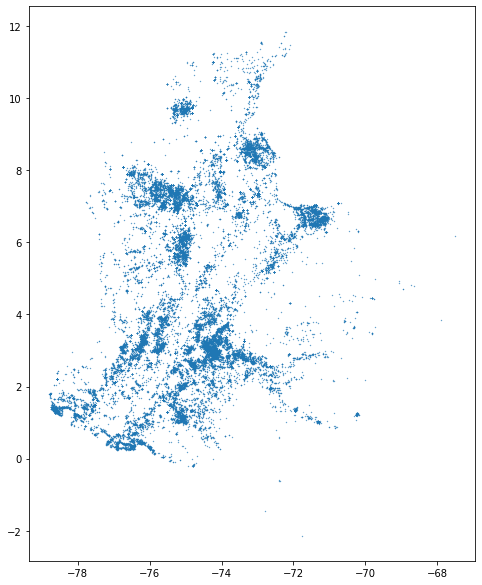

In [9]:
minas.plot(markersize = 0.1, figsize = (8,12))

In [10]:
### ----- Forma de extraer por x y y ------- ###
minas['Longitud'] = minas['geometry'].x
minas['Latitud'] = minas['geometry'].y
### ----- Forma 2: por cordenadas ---- ####
minas['Longitud'] = minas['geometry'].apply(lambda x: x.coords[0][0])
minas['Latitud'] = minas['geometry'].apply(lambda x: x.coords[0][1])

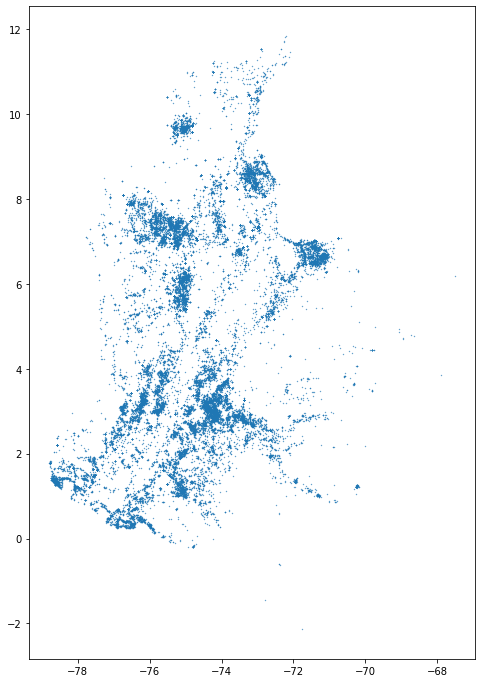

In [11]:
## Graficar Puntos latitud, longitud
fig, ax = plt.subplots(figsize = (8,12))
ax.scatter(minas['Longitud'], minas['Latitud'], s = 0.1);

In [12]:
#### -- Fijar indice de paises ----- #
paises = paises.set_index('name')

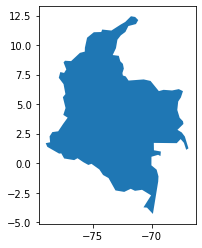

In [13]:
#### --- Filtrar colombia
paises.loc[['Colombia']].plot();

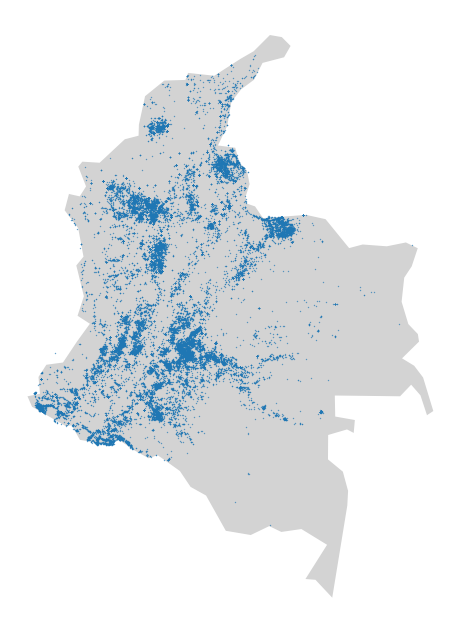

In [14]:
## --- Agregar el contorno de Colombia 
fig, ax = plt.subplots(figsize = (8,12))
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
minas.plot(markersize = 0.1, ax = ax)
ax.axis('off');

In [15]:
## Simular heridos
minas['heridos'] = np.random.randint(1,100,len(minas))**2

In [16]:
mpios = gpd.read_file('Datos/MPM/MPM_FuenteCensal_2018.shp')
mpios.to_crs(epsg=4326, inplace=True)

<AxesSubplot:>

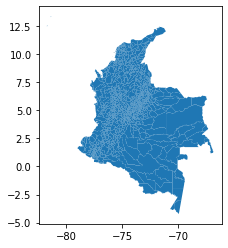

In [17]:
mpios.plot()

In [1]:
# Las ciudades del mundo también vienen pre-cargadas en geopandas
ciudades = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

NameError: name 'gpd' is not defined

In [2]:
# Crear una figura blanca 
fig, ax = plt.subplots(1, 1, figsize = (18,8))
# Fijar un mapa del mundo
world.boundary.plot(edgecolor='black', ax=ax)
# Graficar las ciudades 
ciudades.plot(ax=ax, marker='o', color='red', markersize=8)
# Desaparecer la cuadricula
ax.axis('off')
# Almacenar png
plt.savefig('ciudades_mundo.png');

NameError: name 'plt' is not defined

In [ ]:
Categorias= minas['tipo_area'].astype('category').cat.codes

In [ ]:
set(minas['tipo_area'])

In [ ]:
set(Categorias)

In [ ]:
## SQL Pandas

In [ ]:
ciudades.query('name=="Bogota"')

In [ ]:
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Fijar el mapa de colombia como base
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
# Graficar lineas de los municipios
mpios.boundary.plot(ax = ax, edgecolor='k', linewidth=0.2, alpha = 0.8)
# Graficar categorias rural y urbano aumentando el tamaño dependiendo de los heridos simulados
ax.scatter(minas['Longitud'], minas['Latitud'], c = Categorias,s = minas['heridos']*0.001)
# Agregar bogota 
ciudades.query('name=="Bogota"').plot(ax=ax, marker='*', color='red', markersize=50)
ax.axis('off');


Markers: https://matplotlib.org/3.2.1/api/markers_api.html

### Vivienda nueva en Bogotá 

### Ejercicio: Graficar 

In [ ]:
viviendas = pd.read_csv('Datos/vivienda_nueva_bta.csv')

In [ ]:
viviendas

In [ ]:
## Cambiar nombre de columnas 
viviendas.rename(columns={'Latitud': 'lon', 'Longitud':'lat'}, inplace = True)

In [ ]:
viviendas[['lon', 'lat']].apply(Point, axis = 1)

In [ ]:
## Crear puntos en forma de figura geometrica 
viviendas['geom'] = viviendas[['lon', 'lat']].apply(Point, axis = 1)

In [ ]:
## Definir la base de datos como geoDataFrame
viviendas = gpd.GeoDataFrame(viviendas.drop(columns = 'geom'), geometry = viviendas['geom'])
## Cambiar el formato a WGS84
viviendas.crs = {'init' :'epsg:4326'}

In [ ]:
##### ----- Cargar localidades 
shp_bog = gpd.read_file("Datos/Localidades/Loca.shp", encoding = "utf-8")
shp_bog = shp_bog.set_index('LocNombre', drop=True)
shp_bog.crs = {'init' :'epsg:4326'}
shp_bog = shp_bog.drop('SUMAPAZ',axis=0) 

In [ ]:
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Fijar el mapa de colombia como base
paises.loc[['Colombia']].plot(ax = ax, color = 'lightgrey')
# Graficar lineas de los municipios
mpios.boundary.plot(ax = ax, edgecolor='k', linewidth=0.2, alpha = 0.8)
# Graficar categorias rural y urbano aumentando el tamaño dependiendo de los heridos simulados
ax.scatter(minas['Longitud'], minas['Latitud'], c = Categorias,s = minas['heridos']*0.001)
# Agregar bogota 
ciudades.query('name=="Bogota"').plot(ax=ax, marker='*', color='red', markersize=50)
ax.axis('off');



# Crear escala de colores

In [ ]:
 colors.ListedColormap(['green', 'red','blue'])

In [ ]:
set(viviendas['Tipo_vivienda'])

In [ ]:
hcmap = colors.ListedColormap(['green', 'red','blue'])
# Crear una figura blanca 
fig, ax = plt.subplots(figsize = (8,12))
# Graficar figura de bogota
shp_bog.plot(color = 'lightgrey', edgecolor = 'k', ax = ax)
# Graficar por tipo de viviendas en la escala de colores
viviendas.plot(column = 'Tipo_vivienda', categorical = True, markersize = 2, cmap = hcmap, ax = ax, 
               legend = True, legend_kwds={'loc': 'lower right'})
ax.axis('off');